# задание 1

Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [90]:
import pandas as pd
from sklearn.metrics import matthews_corrcoef
from scipy.stats.contingency import association

df_products = pd.read_csv("foodmart.products.csv")
df_sales = pd.read_csv("foodmart.sales.csv")

df = df_products.merge(df_sales, on="product_id")

In [91]:
sparse_sales = pd.pivot_table(
    df,
    values="sales",
    index=["date", "store_id"],
    columns=["product_name"],
    fill_value=0,
)

In [92]:
spearman_corr = sparse_sales.corr(method="spearman")

spearman_corr

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.097969,0.001993,0.041981,0.050371,-0.033882,-0.007844,0.077134,0.019108,-0.007614,...,0.033237,0.112359,0.076139,0.018318,0.005265,0.018996,0.018471,0.099764,0.039577,0.018928
Akron City Map,0.097969,1.000000,0.022436,0.098703,0.030165,0.030935,0.031788,-0.002137,0.047911,0.098667,...,0.005623,0.030795,0.039333,-0.001983,-0.053719,0.013590,0.040211,0.022333,0.090423,0.055622
Akron Eyeglass Screwdriver,0.001993,0.022436,1.000000,-0.036888,0.029858,0.076507,-0.005579,0.123704,0.052521,0.088301,...,-0.006781,0.004975,0.059180,0.067207,0.046000,-0.016040,-0.003019,0.040994,-0.001277,0.108524
American Beef Bologna,0.041981,0.098703,-0.036888,1.000000,0.027961,-0.032650,0.027374,-0.016565,-0.041241,0.070463,...,0.009394,0.063805,-0.057211,-0.022645,0.005515,0.092713,-0.007196,0.059298,0.059979,0.040561
American Chicken Hot Dogs,0.050371,0.030165,0.029858,0.027961,1.000000,0.014187,-0.000718,0.051069,0.048408,0.058423,...,0.082403,-0.019304,0.070678,0.071697,0.036806,0.062295,-0.021510,-0.007004,0.105569,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.018996,0.013590,-0.016040,0.092713,0.062295,-0.015969,0.050453,-0.003126,-0.007714,0.042247,...,-0.032531,-0.053064,-0.007445,-0.002923,0.037459,1.000000,0.015116,0.018770,0.025268,0.013656
Washington Diet Soda,0.018471,0.040211,-0.003019,-0.007196,-0.021510,0.074140,0.053977,0.020414,0.013718,-0.007546,...,-0.039151,0.047079,0.107883,0.088316,-0.019259,0.015116,1.000000,-0.025042,0.014216,-0.039504
Washington Mango Drink,0.099764,0.022333,0.040994,0.059298,-0.007004,0.091507,0.056937,0.021470,0.075320,0.011497,...,-0.028520,-0.024756,-0.003357,0.041751,0.159320,0.018770,-0.025042,1.000000,-0.000819,-0.048897


In [93]:
pearson_corr = sparse_sales.corr(method="pearson")

pearson_corr

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.028226,0.007142,0.013510,0.090774,0.045038,-0.019134,0.065257,0.008475,-0.014765,0.040917,...,-0.021486,-0.048885,-0.024276,0.014478,0.023574,1.000000,0.018490,0.047577,0.005696,0.027834
Washington Diet Soda,0.012653,0.035274,-0.017855,-0.031954,-0.037246,0.080757,0.066493,0.034888,-0.001253,0.008366,...,-0.025958,0.037920,0.111450,0.090849,0.023312,0.018490,1.000000,-0.030056,0.009293,-0.046996
Washington Mango Drink,0.089932,0.033875,0.022714,0.043843,0.025975,0.087489,0.068372,0.028454,0.080489,0.013144,...,-0.020503,-0.031946,-0.026589,0.026534,0.116748,0.047577,-0.030056,1.000000,0.014672,-0.051093


In [94]:
target = "American Chicken Hot Dogs"

s_ans = spearman_corr[target].drop(target).idxmax()
p_ans = pearson_corr[target].drop(target).idxmax()

In [95]:
"spearman", s_ans, float(spearman_corr[target][s_ans])

('spearman', 'Great Cranberry Muffins', 0.1981052950789763)

In [96]:
"pearson", p_ans, float(pearson_corr[target][p_ans])

('pearson', 'Mighty Good Monthly Home Magazine', 0.24026934048270548)

<Axes: xlabel='American Chicken Hot Dogs', ylabel='Mighty Good Monthly Home Magazine'>

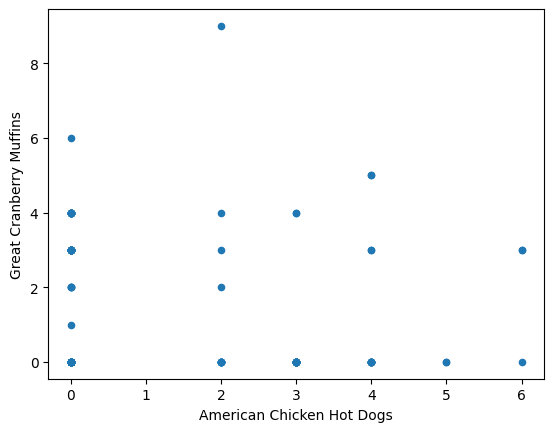

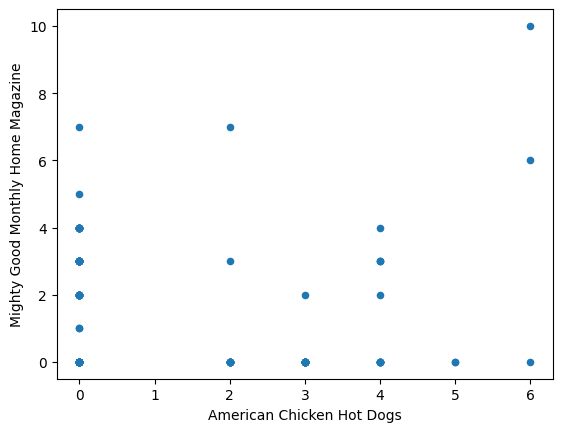

In [97]:
sparse_sales.plot.scatter(x=target, y=s_ans)
sparse_sales.plot.scatter(x=target, y=p_ans)

<Axes: xlabel='date'>

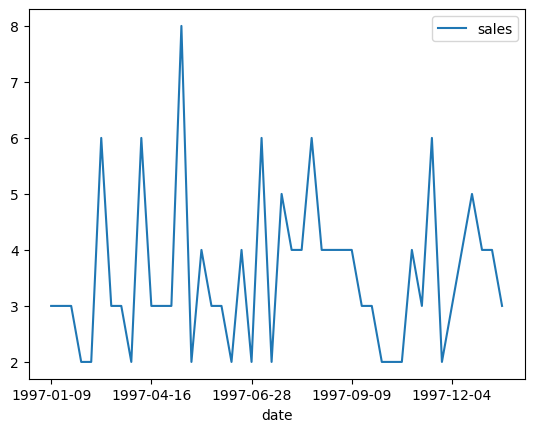

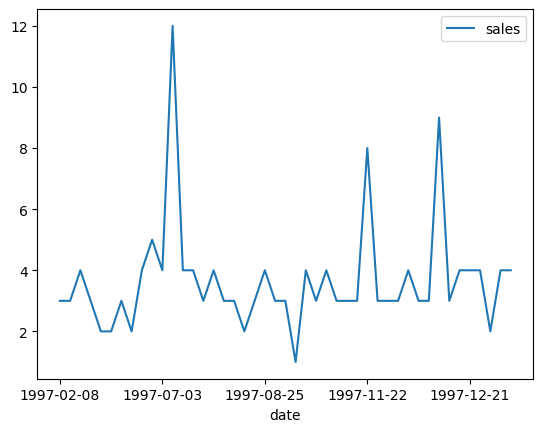

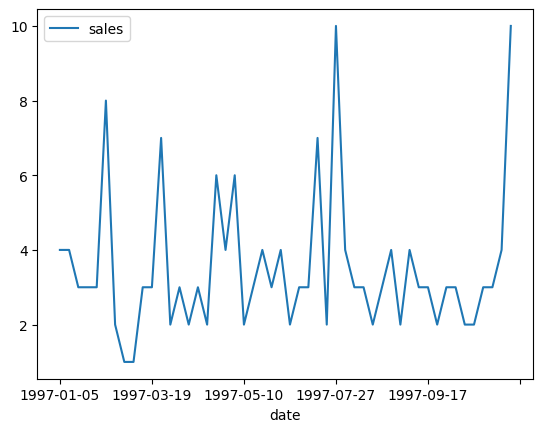

In [98]:
df[df["product_name"] == target][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")
df[df["product_name"] == s_ans][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")
df[df["product_name"] == p_ans][["date", "sales"]].groupby(
    "date"
).sum().reset_index().plot.line(x="date", y="sales")

In [ ]:
# matthews

matthews_corrcoef(df_products["low_fat"], df_products["recyclable_package"])

np.float64(-0.02675542252327238)

array([[<Axes: title={'center': 'low_fat'}>,
        <Axes: title={'center': 'recyclable_package'}>]], dtype=object)

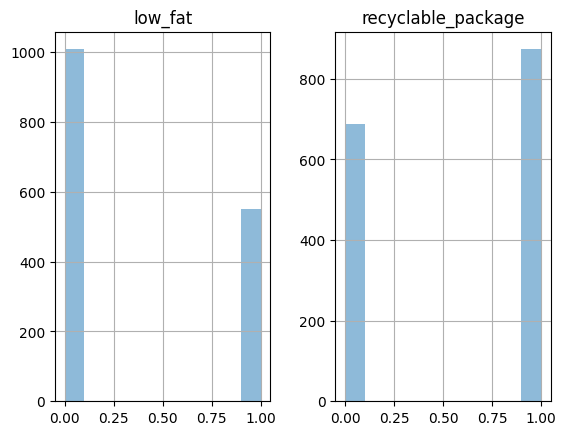

In [103]:
df_products[["low_fat", "recyclable_package"]].astype(float).hist(alpha=0.5)

In [109]:
crosstab = pd.crosstab(df["store_id"], df["brand_name"])

crosstab.head(5)

brand_name,ADJ,Akron,American,Amigo,Applause,Atomic,BBB Best,Best,Best Choice,Better,...,Thresher,Tip Top,Token,Top Measure,Toretti,Toucan,Tri-State,Urban,Walrus,Washington
store_id,,,,,,,,,,,,,,,,,,,,,
2,2,3,17,1,3,5,25,2,39,19,...,4,0,13,4,0,2,27,1,6,8
3,4,13,71,11,13,50,159,13,151,123,...,42,7,69,34,1,16,214,29,43,45
6,8,9,61,12,6,28,141,19,132,73,...,32,9,59,30,4,8,172,24,40,47
7,7,12,74,6,10,49,171,15,163,105,...,36,6,55,39,5,6,215,27,42,53
11,9,15,70,14,12,47,147,18,183,136,...,43,6,55,40,6,10,216,27,39,49


In [ ]:
# cramer

association(crosstab, method="cramer")

0.0343024046787291

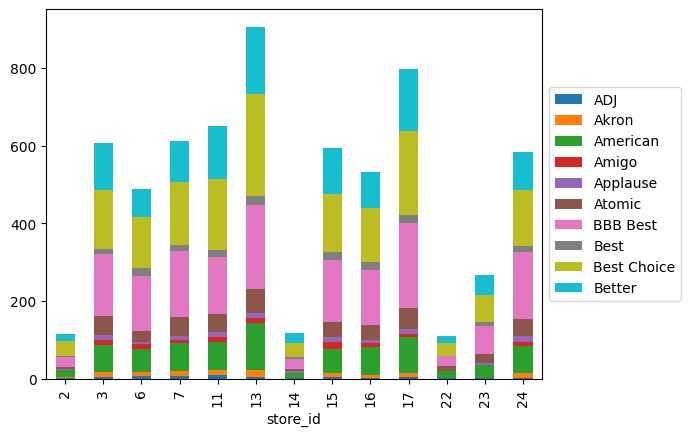

In [ ]:
crosstab.iloc[:, :10].plot.bar(stacked=True).legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

# задание 2

## описание задачи

В этом задании необходимо достичь максимального качества предсказания, используя навыки полученные за 4 недели обучения

Кто достигнет максимального значения на тестовой выборке, получит *15 баллов*

Пожалуйста, оформляйте ноутбук аккуратно. Все выводы подписывайте, оформляйте заголовки.

Для справедливой оценки все должны использовать одну и ту же часть исходного датасета в качестве тестового набора данных. Используйте разбиение приведенное ниже


```
train_test_split(X, y, test_size = 0.3, random_state = 69)
```
И модель, с которой вы работаете - это линейная регрессия. Другие алгоритмы не используйте.

Метрика, которую вы должны максимизировать

```
r2_score(y_test, y_pred) и root_mean_squared_error(y_test, y_pred)
```

Целевая переменная - *count*

Обратите внимание на столбцы - 'casual', 'registered'. Эти столбцы в сумме дают целевую переменную, по этой причине их надо удалить. Они линейно зависимы.

Используйтие средства библиотеки sklearn, внимательно изучите ее. Существует огромное количество методов для выполнения каждого из этапов, не бойтесь использовать методы неприведенные в лекции

Этапы, которые необходимо проделать в работе для успешного достижения результата:
* EDA (Исследовать данные, понять с чем имеете дело, наработать идеи для генерации фичей и их обработки, обязательно корреляционные матрицы и графики с hue=классы объектов)
* Анализ выбросов и их обработка (в задачах классификации выброс - это объект с таким признаковым описанием, которое отличается очень сильно от типичного и больше соответствует другому классу)
* Генерация новых фичей
* Обработка пропусков (вы можете сгенерировать новые фичи с пропусками, тогда надо подумать об их обработке)
* Обработка категориальных признаков
* Масштабирование вещественных признаков
* Трансформирование таргета
* Нелинейные автоматические трансформации признаков (Kernel Trick, Transfomers)
* Подбор параметров модели (можете менять не только константы, но и оптимизационные алгоритмы и методы регуляризации)
* Отбор признаков
* Обязательно: Составление пайплайна обучения
* Обязательно: Постройте график зависимости y_pred от y_true в разбиении на test и train. Предсказание идеального алгоритма даст прямую y=x, посмотрите какой график получается у вас.

## Bike Sharing Demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные.

In [631]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as ppc
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


data = pd.read_csv("bike_sharing_demand.csv")
data["datetime"] = pd.to_datetime(data["datetime"])

In [632]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


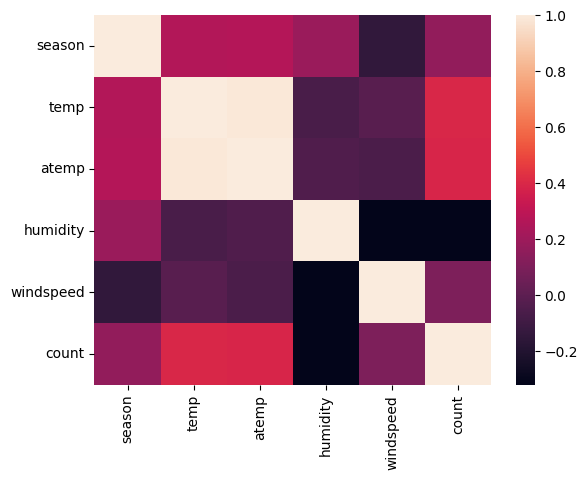

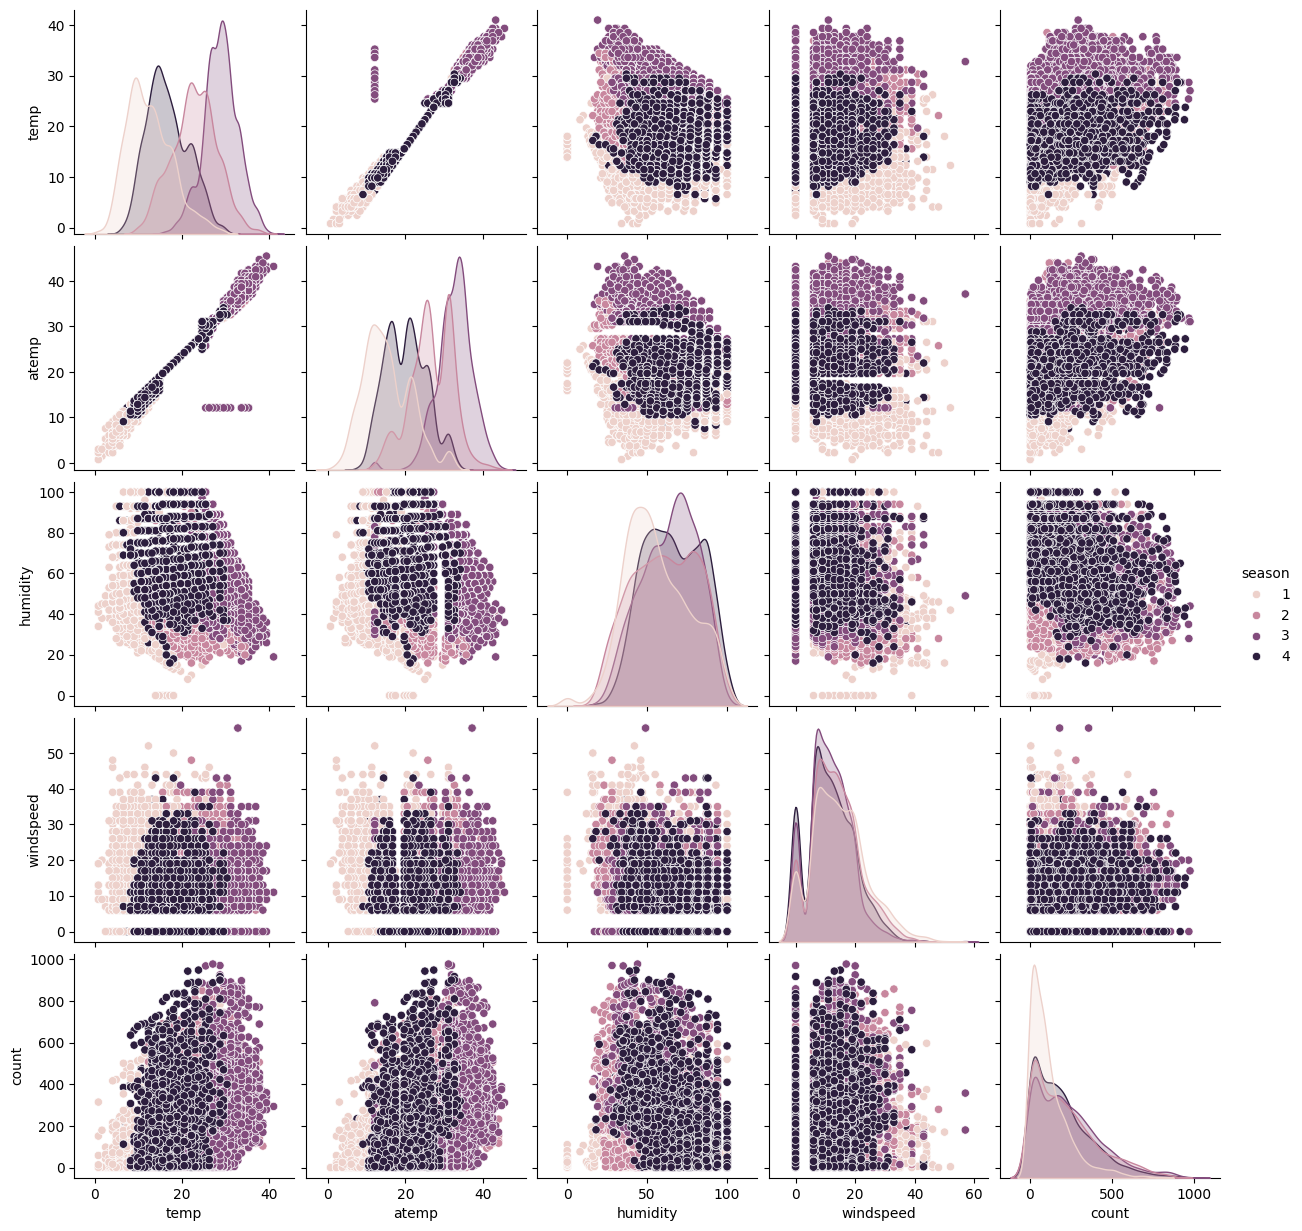

In [633]:
show_data = data[["season", "temp", "atemp", "humidity", "windspeed", "count"]]

sns.heatmap(show_data.corr())
sns.pairplot(show_data, hue="season")

In [634]:
X = data.drop(columns=["count", "casual", "registered"], axis=1)
y = data["count"]

In [635]:
def extract_datetime_features(df, datetime_column):
    df = df.copy()

    df["hour"] = df[datetime_column].dt.hour
    df["day"] = df[datetime_column].dt.day
    df["month"] = df[datetime_column].dt.month
    df["year"] = df[datetime_column].dt.year
    df["dayofweek"] = df[datetime_column].dt.dayofweek

    df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
    df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)
    df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

    df.drop(
        columns=[
            datetime_column,
            # "hour",
            # "day",
            # "month",
            # "year",
            # "dayofweek",
        ],
        inplace=True,
    )

    return df


X_dt_done = extract_datetime_features(X, "datetime")

X_dt_done.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour', 'day', 'month', 'year', 'dayofweek',
       'hour_sin', 'hour_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [636]:
# пропусков не наблюдается

print("before dropping missing values: ", X_dt_done.shape)
print("after: ", X_dt_done.dropna().shape)

before dropping missing values:  (10886, 17)
after:  (10886, 17)


In [637]:
# temp не берем, так как уже есть более корректный atemp

# вытащенные данные из datetime (hour, day, month, year, dayofweek)
# оставляем, тк они положительно влияют на r2

target_col = "count"
numeric_cols = [
    "atemp",
    "humidity",
    "windspeed",
    "hour_sin",
    "hour_cos",
    "month_sin",
    "month_cos",
    "hour",
    "day",
    "month",
    "year",
    "dayofweek",
]
categorical_cols = ["season", "weather", "holiday", "workingday"]

print("numeric cols: ", numeric_cols)
print("categorial cols: ", categorical_cols)

X_num = X_dt_done[numeric_cols]
X_cat = X_dt_done[categorical_cols]

numeric cols:  ['atemp', 'humidity', 'windspeed', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'hour', 'day', 'month', 'year', 'dayofweek']
categorial cols:  ['season', 'weather', 'holiday', 'workingday']


In [638]:
# распределяем веса числовым признакам

# выделение atemp дало лучшие результаты, чем
# увеличение влияния скорости ветра

# изменение веса humidity не дало значительного улучшения
# также как и удаление этого столбца

column_weights = {
    "atemp": 3,
    "humidity": 1,
    "windspeed": 1,
}

X_num_weighted = X_num.copy()
for col, weight in column_weights.items():
    if col in X_num_weighted.columns:
        X_num_weighted[col] = X_num_weighted[col] * weight

X_num = X_num_weighted

In [639]:
scaler = ppc.StandardScaler()
X_num = scaler.fit_transform(X_num)

In [640]:
enc = ppc.OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)
X_cat = enc.fit_transform(X_cat)

In [641]:
# дало значительное улучшение метрик

X_num = ppc.PolynomialFeatures(degree=4).fit_transform(X_num)

In [642]:
X = np.concatenate([X_num, X_cat], axis=1)

In [643]:
(X_train, X_test, y_train, y_test) = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=69,
)

In [644]:
from sklearn.linear_model import LassoCV, LinearRegression

est = LinearRegression(n_jobs=4)

# est = LassoCV(n_jobs=4, cv=4)

est.fit(X_train, y_train)

LinearRegression(n_jobs=4)

In [645]:
y_pred = est.predict(X_test)

In [646]:
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("r2:\t", r2)
print("rmse:\t", rmse)

r2:	 0.8939293770712451
rmse:	 59.11067489362451


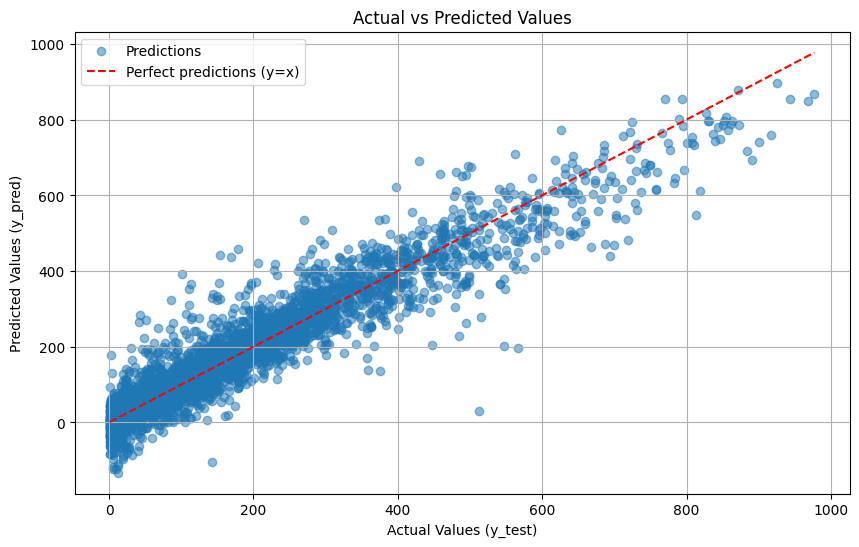

In [647]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')


y_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(y_line, y_line, '--r', label='Perfect predictions (y=x)')


plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)


plt.show()

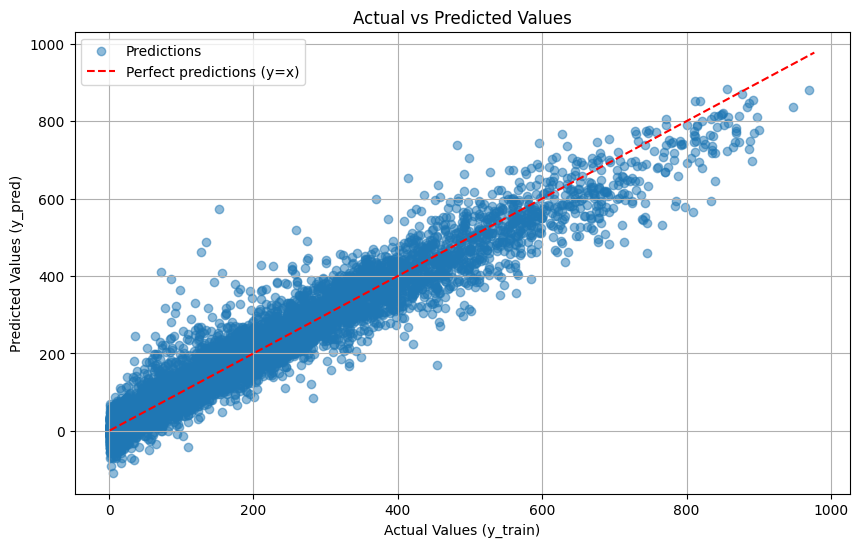

In [648]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_train = est.predict(X_train)

plt.figure(figsize=(10, 6))

plt.scatter(y_train, y_pred_train, alpha=0.5, label='Predictions')

y_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(y_line, y_line, '--r', label='Perfect predictions (y=x)')

plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.show()

In [649]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures


class DatetimeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, datetime_column):
        self.datetime_column = datetime_column

    def fit(self, X, y=None):
        return self

    def transform(self, df: pd.DataFrame):
        df = df.copy()
        df["hour"] = df[self.datetime_column].dt.hour
        df["day"] = df[self.datetime_column].dt.day
        df["month"] = df[self.datetime_column].dt.month
        df["year"] = df[self.datetime_column].dt.year
        df["dayofweek"] = df[self.datetime_column].dt.dayofweek

        df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
        df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)
        df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
        df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

        df.drop(
            columns=[self.datetime_column],
            inplace=True,
        )

        return df


class WeightTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_weights):
        self.column_weights = column_weights

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, weight in self.column_weights.items():
            if col in X.columns:
                X[col] = X[col] * weight
        return X


data = pd.read_csv("bike_sharing_demand.csv")
data["datetime"] = pd.to_datetime(data["datetime"])

X = data.drop(columns=["count", "casual", "registered"], axis=1)
y = data["count"]

numeric_cols = [
    "datetime",
    "atemp",
    "humidity",
    "windspeed",
]
categorical_cols = ["season", "weather", "holiday", "workingday"]

numeric_transformer = Pipeline(
    steps=[
        ("datetime_features", DatetimeTransformer(datetime_column="datetime")),
        (
            "weight_features",
            WeightTransformer(column_weights={"atemp": 3}),
        ),
        ("imputer", SimpleImputer(strategy="mean")),
        ("polynomial_featurer", PolynomialFeatures(4)),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        (
            "encoder",
            OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False),
        )
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            LinearRegression(n_jobs=4),
        ),
    ]
)

(X_train, X_test, y_train, y_test) = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=69,
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("r2:\t", r2)
print("rmse:\t", rmse)


r2:	 0.8934789932933401
rmse:	 59.236036128945784
